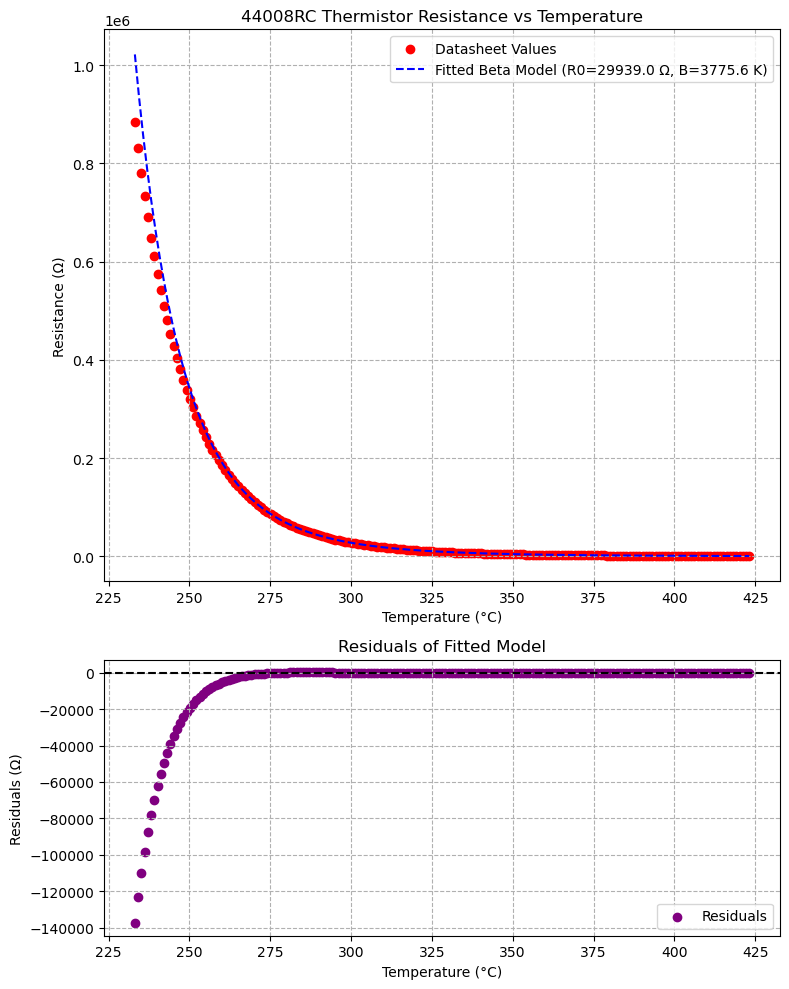

Root Mean Square Error (RMSE): 22057.91 Ω (26.01%)


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# Corrected Resistance vs Temperature Data from Datasheet
temperature_resistance_pairs = [
    (-40, 884.6), (-39, 830.9), (-38, 780.8), (-37, 733.9), (-36, 690.2),
    (-35, 649.3), (-34, 611.0), (-33, 575.2), (-32, 541.7), (-31, 510.4),
    (-30, 481.0), (-29, 453.5), (-28, 427.7), (-27, 403.5), (-26, 380.9),
    (-25, 359.6), (-24, 339.6), (-23, 320.9), (-22, 303.3), (-21, 286.7),
    (-20, 271.2), (-19, 256.5), (-18, 242.8), (-17, 229.8), (-16, 217.6),
    (-15, 206.2), (-14, 195.4), (-13, 185.2), (-12, 175.6), (-11, 166.6),
    (-10, 158.0), (-9, 150.0), (-8, 142.4), (-7, 135.2), (-6, 128.5),
    (-5, 122.1), (-4, 116.0), (-3, 110.3), (-2, 104.9), (-1, 99.80),
    (0, 94.98), (1, 90.41), (2, 86.09), (3, 81.99), (4, 78.11),
    (5, 74.44), (6, 70.96), (7, 67.66), (8, 64.53), (9, 61.56),
    (10, 58.75), (11, 56.07), (12, 53.54), (13, 51.13), (14, 48.84),
    (15, 46.67), (16, 44.60), (17, 42.64), (18, 40.77), (19, 38.99),
    (20, 37.30), (21, 35.70), (22, 34.17), (23, 32.71), (24, 31.32),
    (25, 30.00), (26, 28.74), (27, 27.54), (28, 26.40), (29, 25.31),
    (30, 24.27), (31, 23.28), (32, 22.33), (33, 21.43), (34, 20.57),
    (35, 19.74), (36, 18.96), (37, 18.21), (38, 17.49), (39, 16.80),
    (40, 16.15), (41, 15.52), (42, 14.92), (43, 14.35), (44, 13.80),
    (45, 13.28), (46, 12.77), (47, 12.29), (48, 11.83), (49, 11.39),
    (50, 10.97), (51, 10.57), (52, 10.18), (53, 9.807), (54, 9.450),
    (55, 9.109), (56, 8.781), (57, 8.467), (58, 8.166), (59, 7.876),
    (60, 7.599), (61, 7.332), (62, 7.076), (63, 6.830), (64, 6.594),
    (65, 6.367), (66, 6.149), (67, 5.940), (68, 5.738), (69, 5.545),
    (70, 5.359), (71, 5.180), (72, 5.007), (73, 4.842), (74, 4.682),
    (75, 4.529), (76, 4.381), (77, 4.239), (78, 4.102), (79, 3.970),
    (80, 3.843), (81, 3.720), (82, 3.602), (83, 3.489), (84, 3.379),
    (85, 3.273), (86, 3.172), (87, 3.073), (88, 2.979), (89, 2.887),
    (90, 2.799), (91, 2.714), (92, 2.632), (93, 2.552), (94, 2.476),
    (95, 2.402), (96, 2.331), (97, 2.262), (98, 2.195), (99, 2.131),
    (100, 2.069), (101, 2.009), (102, 1.950), (103, 1.894), (104, 1.840),
    (105, 1.788), (106, 1.737), (107, 1.688), (108, 1.640), (109, 1.594),
    (110, 1.550), (111, 1.507), (112, 1.465), (113, 1.425), (114, 1.386),
    (115, 1.348), (116, 1.311), (117, 1.276), (118, 1.241), (119, 1.208),
    (120, 1.176), (121, 1.145), (122, 1.114), (123, 1.085), (124, 1.057),
    (125, 1.029), (126, 1.002), (127, 0.9763), (128, 0.9511), (129, 0.9267),
    (130, 0.9030), (131, 0.8800), (132, 0.8577), (133, 0.8361), (134, 0.8150),
    (135, 0.7946), (136, 0.7748), (137, 0.7556), (138, 0.7369), (139, 0.7188),
    (140, 0.7012), (141, 0.6841), (142, 0.6675), (143, 0.6513), (144, 0.6356),
    (145, 0.6203), (146, 0.6055), (147, 0.5911), (148, 0.5771), (149, 0.5635),
    (150, 0.5502)
]

temperature_values = np.array([v[0] for v in temperature_resistance_pairs]) # degC
resistance_values = np.array([v[1] for v in temperature_resistance_pairs]) # kOhm

I_fit = (temperature_values >= 0) & (temperature_values <= 50)

temperature_values = temperature_values + 273.15 # degC -> K
resistance_values = resistance_values*1e3 # kOhm -> Ohm

# Create DataFrame
df = pd.DataFrame({"Temperature (°C)": temperature_values, "Resistance (Ω)": resistance_values})

# Define Beta Model
def beta_model(T, R0, B):
    T = np.array(T, dtype=float)  # Ensure float conversion
    T0 = 298.15  # Reference temperature in Kelvin (25°C)
    return R0 * np.exp(B * ((1 / T) - (1 / T0)))

# Fit Beta Model with explicit bounds
popt, pcov = curve_fit(beta_model, df["Temperature (°C)"][I_fit], df["Resistance (Ω)"][I_fit], p0=[30000, 4000], bounds=([1000, 2000], [60000, 6000]))
R0_fitted, B_fitted = popt

# Compute residuals
residuals = df["Resistance (Ω)"].values - beta_model(df["Temperature (°C)"].values, R0_fitted, B_fitted)

# Compute RMSE
rmse = np.sqrt(np.mean(residuals**2))
mean_resistance = np.mean(df["Resistance (Ω)"].values)
rmse_percent = (rmse / mean_resistance) * 100

# Generate smooth curve
T_fit = np.linspace(np.min(df["Temperature (°C)"].values), np.max(df["Temperature (°C)"].values), 300)
R_fit = beta_model(T_fit, *popt)

# Plot Data, Fit, and Residuals
fig, ax = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [2, 1]})

# Plot Original Data and Fit
ax[0].scatter(df["Temperature (°C)"], df["Resistance (Ω)"], color='red', label="Datasheet Values", marker='o')
ax[0].plot(T_fit, R_fit, label=f"Fitted Beta Model (R0={R0_fitted:.1f} Ω, B={B_fitted:.1f} K)", linestyle="--", color='blue')
ax[0].set_xlabel("Temperature (°C)")
ax[0].set_ylabel("Resistance (Ω)")
# ax[0].set_yscale("log")
ax[0].set_title("44008RC Thermistor Resistance vs Temperature")
ax[0].legend()
ax[0].grid(True, which="both", linestyle="--")

# Plot Residuals
ax[1].scatter(df["Temperature (°C)"], residuals, color='purple', marker='o', label="Residuals")
ax[1].axhline(0, color='black', linestyle="--")
ax[1].set_xlabel("Temperature (°C)")
ax[1].set_ylabel("Residuals (Ω)")
ax[1].set_title("Residuals of Fitted Model")
ax[1].legend()
ax[1].grid(True, linestyle="--")

# Show the plots
plt.tight_layout()
plt.show()

# Print RMSE and percentage error
print(f"Root Mean Square Error (RMSE): {rmse:.2f} Ω ({rmse_percent:.2f}%)")


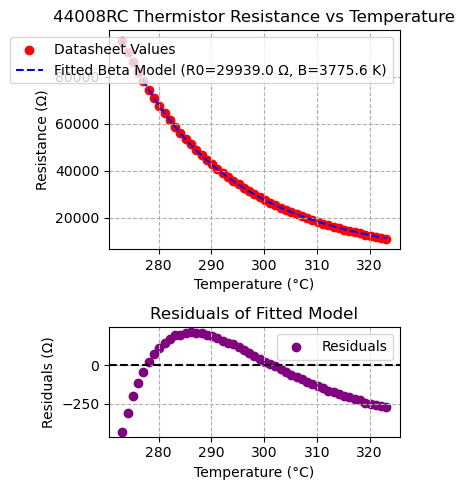

Root Mean Square Error (RMSE): 174.52
Root Mean Square Fractional Error (RMSFE): 0.894018 %


In [23]:

# Plot Data, Fit, and Residuals
fig, ax = plt.subplots(2, 1, figsize=(4, 5), gridspec_kw={'height_ratios': [2, 1]})

# Plot Original Data and Fit
T_fit = df["Temperature (°C)"][I_fit]
R = df["Resistance (Ω)"][I_fit]
R_fit = beta_model(T_fit, *popt)

rmse = np.sqrt(np.mean((R - R_fit)**2))
rmsfe = np.sqrt(np.mean(((R - R_fit)/R_fit)**2))

ax[0].scatter(df["Temperature (°C)"][I_fit], df["Resistance (Ω)"][I_fit], color='red', label="Datasheet Values", marker='o')
ax[0].plot(T_fit, R_fit, label=f"Fitted Beta Model (R0={R0_fitted:.1f} Ω, B={B_fitted:.1f} K)", linestyle="--", color='blue')
ax[0].set_xlabel("Temperature (°C)")
ax[0].set_ylabel("Resistance (Ω)")
# ax[0].set_yscale("log")
ax[0].set_title("44008RC Thermistor Resistance vs Temperature")
ax[0].legend()
ax[0].grid(True, which="both", linestyle="--")

# Plot Residuals
ax[1].scatter(df["Temperature (°C)"][I_fit], residuals[I_fit], color='purple', marker='o', label="Residuals")
ax[1].axhline(0, color='black', linestyle="--")
ax[1].set_xlabel("Temperature (°C)")
ax[1].set_ylabel("Residuals (Ω)")
ax[1].set_title("Residuals of Fitted Model")
ax[1].legend()
ax[1].grid(True, linestyle="--")

# Show the plots
plt.tight_layout()
plt.show()

# Print RMSE and percentage error
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"Root Mean Square Fractional Error (RMSFE): {rmsfe*100:g} %")


In [29]:
from uncertainties import ufloat

R0_fit = ufloat(popt[0], np.sqrt(pcov[0,0]))
B_fit = ufloat(popt[1], np.sqrt(pcov[1,1]))

print(f"R0 = {R0_fit:.2uS}")
print(f"B = {B_fit:.2uS}")

R0 = 29939(30)
B = 3775.6(4.7)
